<a href="https://colab.research.google.com/github/antonemking/at-challenges/blob/challenge-0/sr_attention_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Define the dimensions
d_model = 64  # Embedding size
seq_len = 10  # Sequence length (number of tokens)
batch_size = 2  # Number of examples in a batch

# Generate random queries, keys, and values (for simplicity, use random numbers)
queries = np.random.rand(batch_size, seq_len, d_model)
keys = np.random.rand(batch_size, seq_len, d_model)
values = np.random.rand(batch_size, seq_len, d_model)

print("Queries shape:", queries.shape)
print("Keys shape:", keys.shape)
print("Values shape:", values.shape)


Queries shape: (2, 10, 64)
Keys shape: (2, 10, 64)
Values shape: (2, 10, 64)


In [ ]:
def scaled_dot_product_attention(query, key, value):
    # Step 1: Calculate the dot product between query and key (transpose the key)
    scores = np.matmul(query, key.transpose(0, 2, 1))  # Shape: (batch_size, seq_len, seq_len)

    # Step 2: Scale the scores by the square root of the dimension size
    scale_factor = np.sqrt(query.shape[-1])
    scores /= scale_factor

    # Step 3: Apply softmax to get the attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)

    # Step 4: Multiply the attention weights with the values
    output = np.matmul(attention_weights, value)  # Shape: (batch_size, seq_len, d_model)

    return output, attention_weights

# Compute the output and attention weights
output, attention_weights = scaled_dot_product_attention(queries, keys, values)

print("Attention output shape:", output.shape)
print("Attention weights shape:", attention_weights.shape)


Attention output shape: (2, 10, 64)
Attention weights shape: (2, 10, 10)


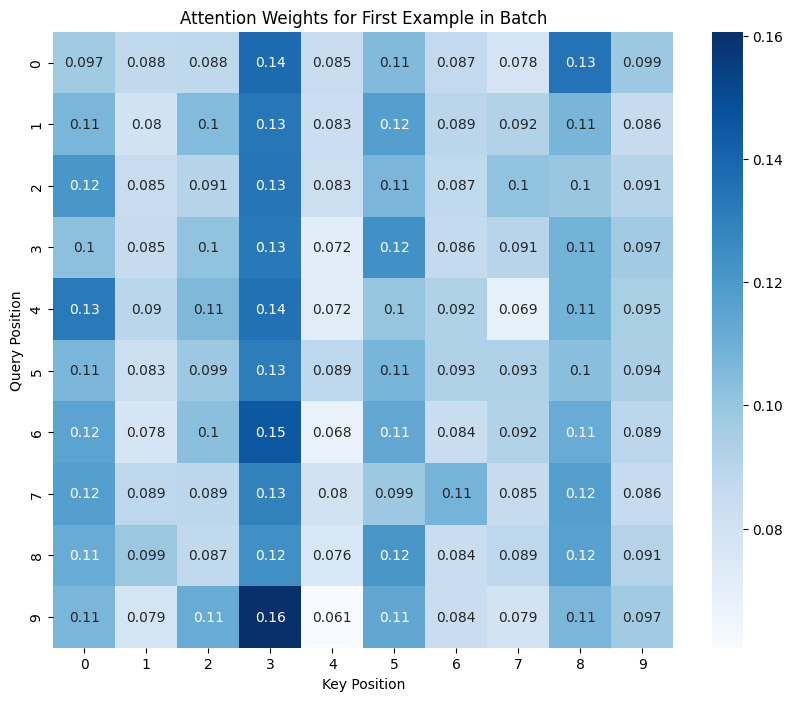

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the attention weights for the first example in the batch
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights[0], annot=True, cmap='Blues')
plt.title('Attention Weights for First Example in Batch')
plt.xlabel('Key Position')
plt.ylabel('Query Position')
plt.show()


In [ ]:
print("Attention Output (First Example):")
print(output[0])  # Print the attention output for the first example in the batch


Attention Output (First Example):
[[0.51882815 0.5597879  0.55773086 0.37695749 0.53533059 0.48281991
  0.55987331 0.55686315 0.50198973 0.43017428 0.72372344 0.49900056
  0.51879443 0.57373106 0.63139014 0.52009314 0.43082377 0.45395708
  0.63292523 0.58878322 0.69354515 0.48593408 0.40411057 0.54063435
  0.41904555 0.45463035 0.40023034 0.5040584  0.50514079 0.52508179
  0.41233822 0.45952261 0.59480612 0.60175993 0.46571834 0.56530626
  0.61094022 0.51668037 0.55499099 0.58981062 0.59184923 0.5089468
  0.59225663 0.47699775 0.39987003 0.50029639 0.49794438 0.46123058
  0.64231152 0.67941479 0.53781649 0.42626514 0.54858472 0.53602673
  0.43688509 0.55322428 0.46223833 0.50313786 0.54059611 0.58582768
  0.52537908 0.2766918  0.50606496 0.50710271]
 [0.51539513 0.55048049 0.57111769 0.38247033 0.52988878 0.51630414
  0.58137491 0.55155629 0.51733123 0.42713088 0.72447007 0.50568575
  0.53908911 0.55822524 0.6311887  0.49781051 0.40330548 0.45079088
  0.64419925 0.57717074 0.69611895 0